In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Vic_petition_data.csv',encoding="utf-8")

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
x, y = (df[['Title', 'Text','Title_str_len' ,
       'start_time', 'Text_len_p1','Text_len_p2', 'Title_len', 'Text_str_len','Image','Tweet']], 
         df.No_Supporters_log)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

text_court_vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,
                             ngram_range=(1, 2),
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2500) 

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

total_court_vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,
                             ngram_range=(1, 2),
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2500)

In [153]:
total_text_features=total_court_vectorizer.fit_transform((df.Text).values.astype('U'))

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
text_idf_transformer = TfidfTransformer(smooth_idf=False)

In [13]:

train_text_features = text_court_vectorizer.fit_transform((x_train.Text).values.astype('U'))
#train_text_features = train_text_features.toarray()
test_text_features = text_court_vectorizer.transform((x_test.Text).values.astype('U'))
#test_text_features = test_text_features.toarray()


# import pickle
# pickle.dump(text_court_vectorizer,open('text_court_vectorizer_v2.pickle','wb'))

In [29]:

# train_text_idf_features = text_idf_transformer.fit_transform(train_text_features)
# train_text_idf_features=train_text_idf_features.toarray()
# test_text_idf_features = text_idf_transformer.transform(test_text_features)
# test_text_idf_features=test_text_idf_features.toarray()

In [28]:
#text_court_vectorizer.vocabulary_

In [10]:
# title_court_vectorizer = CountVectorizer(analyzer = "word",   
#                              tokenizer = None,
#                              ngram_range=(1, 3),
#                              preprocessor = None, 
#                              stop_words = None,   
#                              max_features = 2500) 

In [17]:
# title_idf_transformer = TfidfTransformer(smooth_idf=False)

In [11]:
# train_title_features = title_court_vectorizer.fit_transform((x_train.Title).values.astype('U'))
# train_title_features = train_title_features.toarray()
# test_title_features = title_court_vectorizer.transform((x_test.Title).values.astype('U'))
# test_title_features = test_title_features.toarray()

# #import pickle
# pickle.dump(title_court_vectorizer,open('title_court_vectorizer_v2.pickle','wb'))

In [27]:
# train_title_idf_features = title_idf_transformer.fit_transform(train_title_features)
# train_title_idf_features=train_title_idf_features.toarray()
# test_title_idf_features = title_idf_transformer.transform(test_title_features)
# test_title_idf_features=test_title_idf_features.toarray()

## Topic modeling using gesim


In [44]:
import gensim
train_gensim_cop = gensim.matutils.Sparse2Corpus(train_text_features, documents_columns=False)
test_gensim_cop = gensim.matutils.Sparse2Corpus(test_text_features, documents_columns=False)

In [154]:
total_gensim_cop = gensim.matutils.Sparse2Corpus(total_text_features, documents_columns=False)

In [155]:
id2word_dict = dict((v, k) for k, v in text_court_vectorizer.vocabulary_.items())
id2word_dict_total = dict((v, k) for k, v in total_court_vectorizer.vocabulary_.items())

In [45]:
from gensim import corpora, models, similarities
tfidf_train = models.TfidfModel(train_gensim_cop)

In [156]:
tfidf_total = models.TfidfModel(total_gensim_cop)

In [157]:
train_corpus_tfidf = tfidf_train[train_gensim_cop]
test_corpus_tfidf = tfidf_train[test_gensim_cop]
total_corpus_tfidf = tfidf_total[total_gensim_cop]

In [40]:
lsi = models.LsiModel(corpus_tfidf, id2word=id2word_dict, num_topics=10) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi


In [202]:
# LDA_model_train = models.LdaModel(train_corpus_tfidf, id2word=id2word_dict, alpha="auto", num_topics=20)

# LDA_model_test = models.LdaModel(test_corpus_tfidf, id2word=id2word_dict, alpha="auto",num_topics=20)
LDA_model_total = models.LdaModel(total_corpus_tfidf, id2word=id2word_dict_total, alpha="auto",num_topics=20)

In [203]:
LDA_model_total.print_topics(20)

[(0,
  '0.007*"school" + 0.005*"city" + 0.004*"area" + 0.004*"community" + 0.003*"park" + 0.003*"street" + 0.003*"would" + 0.003*"sheriff" + 0.003*"traffic" + 0.003*"public"'),
 (1,
  '0.007*"movie" + 0.005*"energy" + 0.004*"lane" + 0.004*"whereas" + 0.004*"martin" + 0.004*"county" + 0.004*"restaurant" + 0.003*"child" + 0.003*"children" + 0.003*"middle school"'),
 (2,
  '0.006*"nfl" + 0.006*"school" + 0.006*"facebook" + 0.004*"page" + 0.004*"channel" + 0.004*"de" + 0.004*"elementary" + 0.003*"parents" + 0.003*"com" + 0.003*"www"'),
 (3,
  '0.003*"eggs" + 0.003*"cruel" + 0.003*"sodexo" + 0.003*"battery" + 0.003*"family" + 0.003*"home" + 0.003*"animal" + 0.003*"practice" + 0.003*"battery cage" + 0.003*"cage"'),
 (4,
  '0.005*"mr" + 0.004*"lane" + 0.004*"years" + 0.004*"deer" + 0.004*"town" + 0.003*"ice" + 0.003*"filled" + 0.003*"minnesota" + 0.003*"football" + 0.003*"regular"'),
 (5,
  '0.005*"students" + 0.004*"campus" + 0.004*"husband" + 0.004*"police" + 0.003*"girl" + 0.003*"financial

In [242]:
topic_labels = {
    0: 'Community Issues', 1: 'K-12 Education', 
    2: 'Internet Issues', 3: 'Animal Cruelty', 
    4: 'Environment', 5: 'Education - Teaching', 
    6: 'Tax Policies', 7: 'Food Issues', 
    8: 'Education - School Infrastructure',9: 'Human Rights', 
    10: 'Public Service', 11: 'Park Service',
     12: 'Human Trafficking', 13: 'LGBT',
     14: 'Education-Student Rights', 15: 'Healthcare', 
    16: 'Entertainment',17: 'Drug Issues', 
    18: 'Violence', 19: 'Community Welfare'}


In [137]:
train_topics=LDA_model_train.get_document_topics(train_corpus_tfidf)

In [138]:
test_topics=LDA_model_train.get_document_topics(test_corpus_tfidf)

In [204]:
total_topics=LDA_model_total.get_document_topics(total_corpus_tfidf)
    

In [139]:
train_best_topics = []

In [160]:
# for doc_topics in train_topics:
#     print('New Document \n')
#     print ('Document topics:', doc_topics)
#     print(" ")
#     print('-------------- \n')
#     train_best_topics.append(sorted(doc_topics, key=lambda x: x[1], reverse=True)[0])

In [161]:
# test_best_topics=[]
# for doc_topics in test_topics:
#     print('New Document \n')
#     print ('Document topics:', doc_topics)
#     print(" ")
#     print('-------------- \n')
#     test_best_topics.append(sorted(doc_topics, key=lambda x: x[1], reverse=True)[0])

In [205]:
total_best_topics=[]
for doc_topics in total_topics:
    print('New Document \n')
    print ('Document topics:', doc_topics)
    print(" ")
    print('-------------- \n')
    total_best_topics.append(sorted(doc_topics, key=lambda x: x[1], reverse=True)[0])

New Document 

Document topics: [(14, 0.38872593459406063), (15, 0.20572906709640526), (17, 0.31586331985232952)]
 
-------------- 

New Document 

Document topics: [(3, 0.20644482271389936), (14, 0.40729520887163079), (16, 0.31114567032398482)]
 
-------------- 

New Document 

Document topics: [(3, 0.1230575623193781), (14, 0.42787732232473419), (15, 0.36418689297137086)]
 
-------------- 

New Document 

Document topics: [(3, 0.6346367470942349), (14, 0.2608449606130982)]
 
-------------- 

New Document 

Document topics: [(0, 0.28606301510087373), (3, 0.40560514170354817), (7, 0.095385509378031641), (19, 0.11825961557733392)]
 
-------------- 

New Document 

Document topics: [(0, 0.501126089150845), (3, 0.37505612969888086)]
 
-------------- 

New Document 

Document topics: [(0, 0.38080318197710217), (3, 0.21254907122774724), (7, 0.29434495722450954)]
 
-------------- 

New Document 

Document topics: [(0, 0.011335548462275196), (1, 0.010311669274986507), (2, 0.11959671091444334)

Document topics: [(0, 0.4543417832655795), (17, 0.46626573605312521)]
 
-------------- 

New Document 

Document topics: [(0, 0.15555049186384984), (14, 0.46106421903627381), (17, 0.31169621888431476)]
 
-------------- 

New Document 

Document topics: [(14, 0.26487343976020905), (15, 0.60723654286119977)]
 
-------------- 

New Document 

Document topics: [(3, 0.30341394506747293), (9, 0.22780261404792676), (14, 0.38456308970485242)]
 
-------------- 

New Document 

Document topics: [(14, 0.19595260866428149), (17, 0.71227964263090049)]
 
-------------- 

New Document 

Document topics: [(3, 0.21774997577699939), (7, 0.24017751050907077), (10, 0.4533686029848254)]
 
-------------- 

New Document 

Document topics: [(14, 0.86163096069666312)]
 
-------------- 

New Document 

Document topics: [(3, 0.22468729788956457), (7, 0.25850437899763096), (14, 0.2004575516648418), (19, 0.23623320312041837)]
 
-------------- 

New Document 

Document topics: [(14, 0.42378380441419961), (16, 0.168


New Document 

Document topics: [(3, 0.32211670495647049), (14, 0.38207627164722657), (16, 0.20963873479895523)]
 
-------------- 

New Document 

Document topics: [(2, 0.14726562827109965), (9, 0.016664491454668511), (15, 0.73810320016432451)]
 
-------------- 

New Document 

Document topics: [(3, 0.37109720026609055), (15, 0.19517917346903277), (19, 0.32486963447204587)]
 
-------------- 

New Document 

Document topics: [(0, 0.58438859364223095), (14, 0.2949266564049462)]
 
-------------- 

New Document 

Document topics: [(14, 0.52516133226525097), (15, 0.1430732300278979), (17, 0.25443222822671696)]
 
-------------- 

New Document 

Document topics: [(3, 0.60438539793130308), (7, 0.31131555054030097)]
 
-------------- 

New Document 

Document topics: [(0, 0.81968142003708544), (14, 0.076124711691216887)]
 
-------------- 

New Document 

Document topics: [(15, 0.78932480725564536), (17, 0.14542977010373728)]
 
-------------- 

New Document 

Document topics: [(6, 0.246950758863

 
-------------- 

New Document 

Document topics: [(2, 0.39185801466164188), (15, 0.37694322382458201), (17, 0.1390422077376022)]
 
-------------- 

New Document 

Document topics: [(0, 0.13026437410514155), (14, 0.38375296853964996), (15, 0.41947857534331429)]
 
-------------- 

New Document 

Document topics: [(3, 0.63886494182846865), (17, 0.26810593623417922)]
 
-------------- 

New Document 

Document topics: [(0, 0.61887888744633457), (19, 0.26806757713140089)]
 
-------------- 

New Document 

Document topics: [(3, 0.24608647281524654), (16, 0.61725457946993567), (19, 0.016212447134070072)]
 
-------------- 

New Document 

Document topics: [(0, 0.28435560311314928), (15, 0.41354857238713333), (18, 0.20202394532717952)]
 
-------------- 

New Document 

Document topics: [(3, 0.39247617611319008), (17, 0.11037401800285837), (19, 0.40789327175217915)]
 
-------------- 

New Document 

Document topics: [(3, 0.30422354355489334), (14, 0.18972823615416817), (17, 0.42610832065585275)


New Document 

Document topics: [(0, 0.48010678835292653), (2, 0.14418186831569643), (15, 0.31116858857008667)]
 
-------------- 

New Document 

Document topics: [(2, 0.14278968643272921), (16, 0.28359902986906393), (19, 0.43561120987826424)]
 
-------------- 

New Document 

Document topics: [(6, 0.48003829692772199), (14, 0.39205882630151262)]
 
-------------- 

New Document 

Document topics: [(3, 0.46754197921608337), (7, 0.085276346649432511), (10, 0.35057405598673147)]
 
-------------- 

New Document 

Document topics: [(14, 0.19023965798349982), (15, 0.31817014467913413), (16, 0.0231499170541507), (17, 0.39534115118930968)]
 
-------------- 

New Document 

Document topics: [(5, 0.34191181602102899), (14, 0.010077130250346993), (15, 0.4922061376441515)]
 
-------------- 

New Document 

Document topics: [(0, 0.36556684098418285), (2, 0.42015161619359281), (3, 0.10611088595825025)]
 
-------------- 

New Document 

Document topics: [(14, 0.43601577742035513), (17, 0.47474844138


Document topics: [(16, 0.52376738744614348), (17, 0.39701493347299938)]
 
-------------- 

New Document 

Document topics: [(0, 0.20467631651579188), (14, 0.41518845891962597), (17, 0.31266072452855337)]
 
-------------- 

New Document 

Document topics: [(15, 0.1425912706011595), (16, 0.69723162328904731)]
 
-------------- 

New Document 

Document topics: [(15, 0.89992557680252361)]
 
-------------- 

New Document 

Document topics: [(7, 0.20372782051344215), (17, 0.67114914477530285)]
 
-------------- 

New Document 

Document topics: [(5, 0.27705633859136669), (15, 0.62643520901653993)]
 
-------------- 

New Document 

Document topics: [(2, 0.31303142851865551), (6, 0.55713521780694553)]
 
-------------- 

New Document 

Document topics: [(11, 0.28316452025234135), (13, 0.036346336594467454), (14, 0.57007252427804944)]
 
-------------- 

New Document 

Document topics: [(0, 0.011629710486226914), (1, 0.010579261139170818), (2, 0.011738315391063701), (3, 0.011555675501930807), (4,

Document topics: [(3, 0.04795038066804639), (14, 0.84513943282309234)]
 
-------------- 

New Document 

Document topics: [(15, 0.1168162752853793), (17, 0.75547459704592956)]
 
-------------- 

New Document 

Document topics: [(3, 0.59134964564259007), (14, 0.29329434430663903)]
 
-------------- 

New Document 

Document topics: [(15, 0.33048180031501273), (16, 0.27943418882651061), (17, 0.27935726588522458)]
 
-------------- 

New Document 

Document topics: [(14, 0.30145297441774516), (16, 0.23319220245125336), (17, 0.38567963004986749)]
 
-------------- 

New Document 

Document topics: [(0, 0.016203501872634515), (1, 0.01473992660049748), (2, 0.016354819549659165), (3, 0.016100350132966564), (4, 0.014891186060562035), (5, 0.014692830076817931), (6, 0.015352682845266795), (7, 0.015382162930405806), (8, 0.014792908261879092), (9, 0.015001765373580772), (10, 0.015583991188661305), (11, 0.015372830103805099), (12, 0.014772473596041693), (13, 0.014951289600836557), (14, 0.0169991284584

Document topics: [(15, 0.62587181375675804), (17, 0.28797469814530896)]
 
-------------- 

New Document 

Document topics: [(14, 0.011411062292054576), (15, 0.41743557344832621), (16, 0.47214888560451834)]
 
-------------- 

New Document 

Document topics: [(0, 0.14048366584356425), (14, 0.54056801622819373), (15, 0.23395488944399692), (17, 0.010967599840072001)]
 
-------------- 

New Document 

Document topics: [(5, 0.075210182615675705), (14, 0.38296164599610505), (15, 0.040823579719425372), (17, 0.39668820920893916)]
 
-------------- 

New Document 

Document topics: [(2, 0.12387201227769262), (15, 0.48819880295629769), (16, 0.14709892299549401), (17, 0.18022007767913201)]
 
-------------- 

New Document 

Document topics: [(15, 0.86247497713562005)]
 
-------------- 

New Document 

Document topics: [(9, 0.57235855687738979), (14, 0.31470358415376165)]
 
-------------- 

New Document 

Document topics: [(0, 0.60462368460384219), (14, 0.13307809719195907), (16, 0.17874891952318708)

New Document 

Document topics: [(2, 0.18310939559247419), (14, 0.69790254601121671)]
 
-------------- 

New Document 

Document topics: [(0, 0.21943617634580112), (11, 0.67825597202758026)]
 
-------------- 

New Document 

Document topics: [(3, 0.45474601795104452), (15, 0.4354503799201368)]
 
-------------- 

New Document 

Document topics: [(14, 0.30813276855547622), (15, 0.41265845100555326), (18, 0.17703987727424636)]
 
-------------- 

New Document 

Document topics: [(15, 0.39961102719181635), (19, 0.47824406715175866)]
 
-------------- 

New Document 

Document topics: [(4, 0.14103372794751393), (14, 0.36106615661976688), (17, 0.42016789691704931)]
 
-------------- 

New Document 

Document topics: [(3, 0.47326610522666845), (17, 0.39852892927513733)]
 
-------------- 

New Document 

Document topics: [(0, 0.20649510535594309), (6, 0.31724343163893887), (14, 0.36871815737656433)]
 
-------------- 

New Document 

Document topics: [(0, 0.012007466926927847), (1, 0.0109228969853

New Document 

Document topics: [(15, 0.40461161147161706), (19, 0.47894077340614843)]
 
-------------- 

New Document 

Document topics: [(14, 0.44028190042406007), (15, 0.12071786043334351), (18, 0.36279444144595951)]
 
-------------- 

New Document 

Document topics: [(2, 0.37279091405332365), (9, 0.016536188159947111), (17, 0.51937161724324143)]
 
-------------- 

New Document 

Document topics: [(14, 0.87316425964298328)]
 
-------------- 

New Document 

Document topics: [(14, 0.11344637966415608), (15, 0.47528603724504032), (18, 0.33644176204576048)]
 
-------------- 

New Document 

Document topics: [(14, 0.18673381151761523), (15, 0.46566412975317784), (17, 0.016014914254586253), (18, 0.24163886433078149)]
 
-------------- 

New Document 

Document topics: [(14, 0.12960157642312678), (15, 0.4067025657345093), (17, 0.35845658513302292)]
 
-------------- 

New Document 

Document topics: [(3, 0.84628816397376705)]
 
-------------- 

New Document 

Document topics: [(0, 0.2503279

Document topics: [(3, 0.19799339011214745), (17, 0.45610478564113616), (19, 0.25697124422549417)]
 
-------------- 

New Document 

Document topics: [(13, 0.294856874150209), (15, 0.57758530548395548)]
 
-------------- 

New Document 

Document topics: [(0, 0.30719814186840205), (15, 0.2908112917080109), (17, 0.17724751015104581), (19, 0.14706995865921546)]
 
-------------- 

New Document 

Document topics: [(0, 0.48589598613012269), (11, 0.029885222117658452), (15, 0.39652922634364551)]
 
-------------- 

New Document 

Document topics: [(14, 0.12349006485527195), (15, 0.77417806333189543), (19, 0.012085647244082197)]
 
-------------- 

New Document 

Document topics: [(0, 0.40953618324198066), (3, 0.14721384853834901), (9, 0.17457261702954008), (14, 0.17087104047080517)]
 
-------------- 

New Document 

Document topics: [(0, 0.14492462965927849), (3, 0.026315574335837359), (14, 0.41610741385316768), (17, 0.31768703110038332)]
 
-------------- 

New Document 

Document topics: [(3, 0

Document topics: [(14, 0.34176929026476693), (17, 0.34243836313614334), (19, 0.23652538465395473)]
 
-------------- 

New Document 

Document topics: [(0, 0.40685404912154199), (11, 0.43765332545138741)]
 
-------------- 

New Document 

Document topics: [(6, 0.84679949358478646)]
 
-------------- 

New Document 

Document topics: [(9, 0.65027005011478511), (14, 0.010146157381307209), (15, 0.18289601937112149)]
 
-------------- 

New Document 

Document topics: [(16, 0.86830561391312178)]
 
-------------- 

New Document 

Document topics: [(2, 0.51000530048872983), (3, 0.17370764135780295), (15, 0.23575321008669023)]
 
-------------- 

New Document 

Document topics: [(3, 0.17046461680650904), (15, 0.22336959381821192), (19, 0.46906818225533359)]
 
-------------- 

New Document 

Document topics: [(14, 0.56468187308735707), (15, 0.35896244268907274)]
 
-------------- 

New Document 

Document topics: [(0, 0.54363157148159358), (1, 0.022771200705081963), (2, 0.025265992436715057), (3, 0

Document topics: [(0, 0.020034628899001743), (1, 0.018225008593254686), (2, 0.020221723979621908), (3, 0.019907088248275594), (4, 0.018412031573014284), (5, 0.018166776647870881), (6, 0.018982643862293636), (7, 0.019019094154586944), (8, 0.0182905171601743), (9, 0.01854875605499804), (10, 0.019268642291223152), (11, 0.63371688749670063), (12, 0.018265250944908353), (13, 0.018486345895970268), (14, 0.021018372071894893), (15, 0.021135433934470805), (16, 0.019426782323462233), (17, 0.020575984300920284), (18, 0.01898309876872711), (19, 0.019314932798630179)]
 
-------------- 

New Document 

Document topics: [(3, 0.45004785849355045), (17, 0.4425563337573889)]
 
-------------- 

New Document 

Document topics: [(10, 0.15258578870191064), (14, 0.31683413871587629), (15, 0.40359050788349016)]
 
-------------- 

New Document 

Document topics: [(0, 0.016656500236442561), (1, 0.015152008178172879), (2, 0.016812049354954312), (3, 0.016550464849273038), (4, 0.015307496373299414), (5, 0.0151035

Document topics: [(0, 0.010901036979564084), (2, 0.011002837253067688), (3, 0.01083164083959212), (4, 0.010018165912792126), (6, 0.21666294230923586), (7, 0.010348474581017727), (9, 0.010092559085355649), (10, 0.010484256144012461), (11, 0.010342195857998029), (13, 0.010058601054035176), (14, 0.011436301423664931), (15, 0.011499995796062043), (16, 0.59459559140995133), (17, 0.011195593790228607), (18, 0.010328889142794551), (19, 0.010509443304379256)]
 
-------------- 

New Document 

Document topics: [(10, 0.42616679251479905), (14, 0.44245441423219634)]
 
-------------- 

New Document 

Document topics: [(13, 0.20905534761975192), (15, 0.31841855782062034), (17, 0.34968273067255895), (18, 0.019964095018594502)]
 
-------------- 

New Document 

Document topics: [(3, 0.015312599848726908), (7, 0.8879716656877833)]
 
-------------- 

New Document 

Document topics: [(1, 0.13361307688756133), (3, 0.37095329139971789), (14, 0.42564041151135823)]
 
-------------- 

New Document 

Document


New Document 

Document topics: [(12, 0.22223446338057479), (14, 0.22824199429287043), (15, 0.43174389498604804)]
 
-------------- 

New Document 

Document topics: [(15, 0.19729142858399962), (18, 0.65842133164140848)]
 
-------------- 

New Document 

Document topics: [(14, 0.040821929905002309), (15, 0.37403662147235561), (19, 0.51992477310188623)]
 
-------------- 

New Document 

Document topics: [(9, 0.46099349871984502), (17, 0.43265163118920885)]
 
-------------- 

New Document 

Document topics: [(6, 0.23933806551703085), (10, 0.39922232294992643), (19, 0.22335651708440399)]
 
-------------- 

New Document 

Document topics: [(4, 0.39379224765207554), (6, 0.075883729254616769), (14, 0.13052639131599972), (15, 0.29942776074797833)]
 
-------------- 

New Document 

Document topics: [(0, 0.48907393133626337), (2, 0.01025238216290031), (3, 0.010092861799937701), (11, 0.3353786392868246), (14, 0.010656282746908054), (15, 0.01071563433937988), (17, 0.010431992384231892)]
 
-------


New Document 

Document topics: [(2, 0.23608120792738527), (6, 0.2652249870316899), (14, 0.25720399766548757), (17, 0.14941648681353223)]
 
-------------- 

New Document 

Document topics: [(3, 0.82012137867741441), (10, 0.020734217900493842), (17, 0.085755932266210311)]
 
-------------- 

New Document 

Document topics: [(14, 0.79900850479726349), (19, 0.10774227618998104)]
 
-------------- 

New Document 

Document topics: [(8, 0.2702738190281494), (15, 0.61490350843235597)]
 
-------------- 

New Document 

Document topics: [(13, 0.45923050639251889), (15, 0.41719606167511797)]
 
-------------- 

New Document 

Document topics: [(2, 0.49716298399121484), (15, 0.36843004588202066)]
 
-------------- 

New Document 

Document topics: [(0, 0.78020313838558764), (19, 0.10655284437266829)]
 
-------------- 

New Document 

Document topics: [(2, 0.81897324563708951), (14, 0.010422381109364696), (15, 0.010480428858385824), (17, 0.010203014363395222)]
 
-------------- 

New Document 

Docum


New Document 

Document topics: [(0, 0.010111589922471112), (2, 0.010206018056748643), (3, 0.010047219459304141), (14, 0.010608091091595277), (15, 0.010667172704458249), (17, 0.01038481521247599), (18, 0.81512250877308712)]
 
-------------- 

New Document 

Document topics: [(19, 0.83420890119969526)]
 
-------------- 

New Document 

Document topics: [(2, 0.82324213022728521), (14, 0.010176605685138777), (15, 0.010233287066673908)]
 
-------------- 

New Document 

Document topics: [(0, 0.011649987425421546), (1, 0.010597706726346688), (2, 0.01175878181954796), (3, 0.011575823459072019), (4, 0.010706459192725839), (5, 0.01056384528755697), (6, 0.011038265982023699), (7, 0.011059461575910076), (8, 0.010635799462719352), (9, 0.010785963473361172), (10, 0.011204571975604987), (11, 0.011052751458790219), (12, 0.010621107352128935), (13, 0.010749672419339927), (14, 0.30468793961268931), (15, 0.49578053162942004), (16, 0.011296529197499149), (17, 0.011964781889485476), (18, 0.0110385305352

-------------- 

New Document 

Document topics: [(7, 0.89067118752451824), (10, 0.014871455048106297)]
 
-------------- 

New Document 

Document topics: [(2, 0.84287911620660416)]
 
-------------- 

New Document 

Document topics: [(0, 0.50017008419244879), (2, 0.035290723134731868), (15, 0.37426340452061402)]
 
-------------- 

New Document 

Document topics: [(14, 0.5518048044866295), (15, 0.3354681836131847)]
 
-------------- 

New Document 

Document topics: [(3, 0.35623380834066493), (6, 0.12064593528698368), (19, 0.39457173624134029)]
 
-------------- 

New Document 

Document topics: [(0, 0.83440578961666279)]
 
-------------- 

New Document 

Document topics: [(14, 0.45801027074006079), (16, 0.39245005574759217), (19, 0.050925259371391515)]
 
-------------- 

New Document 

Document topics: [(0, 0.4149905947533864), (14, 0.29872074361987438), (15, 0.19675871033540984)]
 
-------------- 

New Document 

Document topics: [(15, 0.83856455570227995)]
 
-------------- 

New Docume

Document topics: [(3, 0.75553090444499615), (9, 0.02361136946126054), (10, 0.050277582747356719), (18, 0.095746532414692206)]
 
-------------- 

New Document 

Document topics: [(0, 0.32600529384740196), (8, 0.5158870717020323)]
 
-------------- 

New Document 

Document topics: [(1, 0.11068591583738335), (9, 0.012605777931350967), (14, 0.27769199481180068), (17, 0.52056215721452936)]
 
-------------- 

New Document 

Document topics: [(8, 0.15374013323872626), (14, 0.3006079200717936), (15, 0.44643027850667927)]
 
-------------- 

New Document 

Document topics: [(2, 0.12127104217990337), (14, 0.31282385041354183), (15, 0.4810381874142996)]
 
-------------- 

New Document 

Document topics: [(14, 0.74498181708684963), (15, 0.18014030986204782)]
 
-------------- 

New Document 

Document topics: [(9, 0.56699744499921112), (14, 0.27035408414202311)]
 
-------------- 

New Document 

Document topics: [(15, 0.86055021080426242)]
 
-------------- 

New Document 

Document topics: [(0, 0.42

New Document 

Document topics: [(14, 0.83030416047239108)]
 
-------------- 

New Document 

Document topics: [(0, 0.032915663346507425), (14, 0.80229560579685211), (15, 0.010117667404403632)]
 
-------------- 

New Document 

Document topics: [(6, 0.46064664581003956), (14, 0.43636328053078488)]
 
-------------- 

New Document 

Document topics: [(1, 0.83113785781836702)]
 
-------------- 

New Document 

Document topics: [(0, 0.014169505982985811), (1, 0.7403925419679408), (2, 0.014301829006043513), (3, 0.014079302761742653), (4, 0.013021922802015083), (5, 0.012848466060415287), (6, 0.013425488760777414), (7, 0.013451268243068167), (8, 0.012935981628069981), (9, 0.013118621276591014), (10, 0.013627761344646716), (11, 0.013443106949997537), (12, 0.012918112074749046), (13, 0.013074481645762581), (14, 0.014865261194413113), (15, 0.014948051219751681), (16, 0.013739606002789766), (17, 0.014552380132976078), (18, 0.013425810494521658), (19, 0.013660500450742125)]
 
-------------- 

New 

New Document 

Document topics: [(0, 0.76966972023897839), (1, 0.011492681394732647), (2, 0.012751808971386284), (3, 0.012553399985899992), (4, 0.01161061799302524), (5, 0.011455960354851587), (6, 0.01197044584187989), (7, 0.011993431405889994), (8, 0.011533991052982516), (9, 0.011696836383927697), (10, 0.012150796285138907), (11, 0.011986154564703182), (12, 0.01151805820616595), (13, 0.011657480573763484), (14, 0.013254174972393562), (15, 0.013327994188075022), (16, 0.012250519319508527), (17, 0.012975208494312549), (18, 0.011970732682058657), (19, 0.012179987090326012)]
 
-------------- 

New Document 

Document topics: [(2, 0.010003988886728583), (10, 0.53525862646103128), (14, 0.29406290871427776), (15, 0.010456016934380316), (17, 0.010179247014635935)]
 
-------------- 

New Document 

Document topics: [(6, 0.18138804571271047), (14, 0.5633104452886829), (19, 0.11243448406714619)]
 
-------------- 

New Document 

Document topics: [(15, 0.8781689027535674)]
 
-------------- 

New 

Document topics: [(4, 0.12676213046280246), (7, 0.30837669276873408), (14, 0.44486905684599254)]
 
-------------- 

New Document 

Document topics: [(2, 0.85611162295613008)]
 
-------------- 

New Document 

Document topics: [(10, 0.29776281360283019), (14, 0.37071350263914232), (17, 0.25816640520073098)]
 
-------------- 

New Document 

Document topics: [(14, 0.23556585538198635), (17, 0.64984962252328904)]
 
-------------- 

New Document 

Document topics: [(0, 0.25911709523553728), (6, 0.20045530281156568), (7, 0.16382345521670305), (15, 0.30828933550355958)]
 
-------------- 

New Document 

Document topics: [(14, 0.26349230999514728), (17, 0.6060692957759295)]
 
-------------- 

New Document 

Document topics: [(0, 0.34206501264928707), (6, 0.38233268029333034), (19, 0.19999799271182697)]
 
-------------- 

New Document 

Document topics: [(9, 0.63357386972038032), (13, 0.266770026034579)]
 
-------------- 

New Document 

Document topics: [(14, 0.55009882871969928), (19, 0.3347

New Document 

Document topics: [(3, 0.82214033520393337), (14, 0.010231222253402847), (15, 0.01028820593747109), (17, 0.010015878828833286)]
 
-------------- 

New Document 

Document topics: [(14, 0.27407590828386252), (15, 0.29206464599560156), (17, 0.32125617248058219)]
 
-------------- 

New Document 

Document topics: [(19, 0.87391994425032016)]
 
-------------- 

New Document 

Document topics: [(3, 0.29650566356749064), (14, 0.41556843437754509), (15, 0.22451297102970882)]
 
-------------- 

New Document 

Document topics: [(7, 0.86398928137334308)]
 
-------------- 

New Document 

Document topics: [(6, 0.12962712783473471), (16, 0.31033951867166842), (19, 0.46915180654534377)]
 
-------------- 

New Document 

Document topics: [(5, 0.045706433451681024), (6, 0.56533718959774804), (17, 0.27999927893061471)]
 
-------------- 

New Document 

Document topics: [(0, 0.84790899655630791)]
 
-------------- 

New Document 

Document topics: [(2, 0.36270198295841294), (15, 0.542352003

Document topics: [(0, 0.17356110065702721), (6, 0.54743565514024317), (16, 0.15828875788935029)]
 
-------------- 

New Document 

Document topics: [(0, 0.20190440971082343), (7, 0.23298776925411918), (15, 0.43233132392457829)]
 
-------------- 

New Document 

Document topics: [(7, 0.89016550978752051), (10, 0.014868315048168284)]
 
-------------- 

New Document 

Document topics: [(0, 0.38489210250431494), (15, 0.34737892035729329), (17, 0.17825011233785076)]
 
-------------- 

New Document 

Document topics: [(2, 0.63137875733010307), (6, 0.23768229336373581)]
 
-------------- 

New Document 

Document topics: [(8, 0.25543081872709761), (15, 0.36688194427210968), (17, 0.27764663114829014)]
 
-------------- 

New Document 

Document topics: [(12, 0.85592878829519736)]
 
-------------- 

New Document 

Document topics: [(0, 0.32694740823437757), (1, 0.01131734911856422), (2, 0.45879349792642238), (3, 0.012361885378622229), (4, 0.011433486492278986), (5, 0.011281188296908343), (6, 0.01

 
-------------- 

New Document 

Document topics: [(2, 0.2448972372915626), (15, 0.55051664583328719), (19, 0.11332837934476336)]
 
-------------- 

New Document 

Document topics: [(0, 0.015841545471342589), (1, 0.014410663890646935), (2, 0.015989482997327682), (3, 0.015740698036190125), (4, 0.014558544501142011), (5, 0.014364619413503294), (6, 0.015009732299392229), (7, 0.015038553853524662), (8, 0.014462462042310895), (9, 0.014666653670000723), (10, 0.015235873611691141), (11, 0.7103769364645397), (12, 0.014442483850924849), (13, 0.014617305435213527), (14, 0.016619399263577098), (15, 0.016711961325914664), (16, 0.015360916254768998), (17, 0.016269599689250715), (18, 0.015010092020289852), (19, 0.015272475908448369)]
 
-------------- 

New Document 

Document topics: [(0, 0.49197138278032132), (19, 0.36804482754071405)]
 
-------------- 

New Document 

Document topics: [(14, 0.39348073280704449), (17, 0.49878617555785765)]
 
-------------- 

New Document 

Document topics: [(0, 0.

Document topics: [(14, 0.14118739750869533), (15, 0.45215152123416957), (18, 0.30021505996342007)]
 
-------------- 

New Document 

Document topics: [(14, 0.27001123940469957), (15, 0.63429600051239432)]
 
-------------- 

New Document 

Document topics: [(0, 0.5510218211745902), (10, 0.018551213426484549), (15, 0.33268123791621224)]
 
-------------- 

New Document 

Document topics: [(6, 0.40157832953259104), (14, 0.4793822527339206), (16, 0.025163387589537681)]
 
-------------- 

New Document 

Document topics: [(0, 0.010533240809681634), (2, 0.01063160621392434), (3, 0.010466186033115313), (10, 0.010130521979891558), (14, 0.011050445446137829), (15, 0.011111991016443411), (16, 0.010213664333499675), (17, 0.1664283024194689), (19, 0.65197718268265603)]
 
-------------- 

New Document 

Document topics: [(3, 0.30312088451466884), (14, 0.37901848486544426), (15, 0.23598962716526045)]
 
-------------- 

New Document 

Document topics: [(0, 0.012663680636327473), (1, 0.01151983840444401

Document topics: [(0, 0.52939913645466552), (7, 0.33455926672761005)]
 
-------------- 

New Document 

Document topics: [(2, 0.2253381263408005), (7, 0.5236308431129707), (14, 0.09875320980690247)]
 
-------------- 

New Document 

Document topics: [(7, 0.27914183170743045), (14, 0.24153286845699895), (15, 0.37356593042442693)]
 
-------------- 

New Document 

Document topics: [(0, 0.38158519186322498), (2, 0.24838950553401601), (15, 0.24405294947032241)]
 
-------------- 

New Document 

Document topics: [(8, 0.49732387904008279), (17, 0.38396118544039659)]
 
-------------- 

New Document 

Document topics: [(15, 0.41904341309372922), (17, 0.49056127679647921)]
 
-------------- 

New Document 

Document topics: [(0, 0.23442447502045183), (8, 0.15134008380723152), (15, 0.40782872116695912), (19, 0.12683824465959148)]
 
-------------- 

New Document 

Document topics: [(0, 0.2846645652289117), (3, 0.028224859097289074), (19, 0.56380146735916481)]
 
-------------- 

New Document 

Docu

 
-------------- 

New Document 

Document topics: [(0, 0.32371009027333875), (14, 0.18186087079379973), (16, 0.19030321649413792), (17, 0.24243699925331566)]
 
-------------- 

New Document 

Document topics: [(8, 0.094331203207761172), (17, 0.7673314267980027)]
 
-------------- 

New Document 

Document topics: [(0, 0.40674336940196576), (2, 0.02285238745527695), (6, 0.40957041324191457), (14, 0.010367727036368405), (15, 0.010426495380880831), (17, 0.010151030471038316)]
 
-------------- 

New Document 

Document topics: [(0, 0.62807316259227108), (10, 0.24091771080884136)]
 
-------------- 

New Document 

Document topics: [(16, 0.49171169159282885), (17, 0.43214236467325595)]
 
-------------- 

New Document 

Document topics: [(5, 0.026982313631584421), (14, 0.33753268238423789), (17, 0.53969258695702349)]
 
-------------- 

New Document 

Document topics: [(15, 0.039860164362565939), (19, 0.81096150381698728)]
 
-------------- 

New Document 

Document topics: [(1, 0.0493349865703

 
-------------- 

New Document 

Document topics: [(3, 0.53873857251673218), (17, 0.24260517934354178), (18, 0.12594805944122153)]
 
-------------- 

New Document 

Document topics: [(0, 0.24329090575343229), (9, 0.019110119824603471), (17, 0.6092637339380389)]
 
-------------- 

New Document 

Document topics: [(14, 0.55241040523841967), (16, 0.10165795073485434), (17, 0.28303391577434162)]
 
-------------- 

New Document 

Document topics: [(0, 0.65243621295741905), (6, 0.10944553048567267), (13, 0.1430352385989849)]
 
-------------- 

New Document 

Document topics: [(0, 0.60903908634015258), (6, 0.023624696665909658), (17, 0.25205695596927763)]
 
-------------- 

New Document 

Document topics: [(0, 0.051998739041979963), (1, 0.047301972801852471), (2, 0.052484333282723582), (3, 0.051667714485086141), (4, 0.047787380290505006), (5, 0.047150835097443854), (6, 0.04926837192388369), (7, 0.049362976616352874), (8, 0.047471996519162014), (9, 0.048142240913671974), (10, 0.05001066460947

New Document 

Document topics: [(2, 0.53850600310485841), (9, 0.016313032001073147), (14, 0.14939414858452693), (16, 0.23212749366516797)]
 
-------------- 

New Document 

Document topics: [(0, 0.011529644716119629), (1, 0.010488233832292623), (2, 0.011637315153839218), (3, 0.011456246757597533), (4, 0.010595862908261214), (5, 0.010454722174950344), (6, 0.010924242193091254), (7, 0.010945218798291452), (8, 0.010525933077887387), (9, 0.010674545912053121), (10, 0.01108883023598801), (11, 0.010938578013249307), (12, 0.010511392740231516), (13, 0.010638629742993086), (14, 0.012095774922477188), (15, 0.79043383038891857), (16, 0.011179837562248345), (17, 0.011841187109059861), (18, 0.010924503975635028), (19, 0.011115469784815375)]
 
-------------- 

New Document 

Document topics: [(0, 0.015846524813179098), (1, 0.014415193423552089), (2, 0.015994508778818566), (3, 0.71099739446948285), (4, 0.014563120512569772), (5, 0.014369134476000226), (6, 0.015014450135186576), (7, 0.01504328075335

New Document 

Document topics: [(14, 0.37191283210050397), (17, 0.24581045294386844), (19, 0.29149296796757856)]
 
-------------- 

New Document 

Document topics: [(14, 0.56231945556823948), (16, 0.032490210660065078), (17, 0.30559570782796386)]
 
-------------- 

New Document 

Document topics: [(7, 0.23283184148529623), (10, 0.60347780520727368)]
 
-------------- 

New Document 

Document topics: [(0, 0.19820410546877451), (2, 0.2817657430688873), (19, 0.38282932439853401)]
 
-------------- 

New Document 

Document topics: [(0, 0.011222953607781807), (1, 0.010209244244012721), (2, 0.011327760540065981), (3, 0.011151507782785336), (4, 0.010314010351459839), (5, 0.010176623953460938), (6, 0.010633654618298455), (7, 0.010654073258879062), (8, 0.010245940707251888), (9, 0.010390600324387858), (10, 0.010793864574717153), (11, 0.010647609111797494), (12, 0.010231787065822433), (13, 0.010355639653844248), (14, 0.79594276474359016), (15, 0.011839600413064442), (16, 0.010882451141772472), 

Document topics: [(0, 0.58342504946922136), (7, 0.27288595372538677), (18, 0.046276245437452963)]
 
-------------- 

New Document 

Document topics: [(2, 0.48222595034632232), (11, 0.019733994059308473), (17, 0.39110191305306546)]
 
-------------- 

New Document 

Document topics: [(6, 0.11548968230077647), (12, 0.73001682238831078)]
 
-------------- 

New Document 

Document topics: [(14, 0.50983518267376537), (15, 0.010045572891201754), (18, 0.32605048044900298)]
 
-------------- 

New Document 

Document topics: [(4, 0.015229752946769901), (14, 0.23696024852577727), (19, 0.64477579109326411)]
 
-------------- 

New Document 

Document topics: [(0, 0.012689802857805991), (1, 0.011543601190141336), (2, 0.012808307563931979), (3, 0.012609019441170665), (4, 0.62486291163575314), (5, 0.011506717446766504), (6, 0.012023482404649278), (7, 0.01204656978607155), (8, 0.011585093871893205), (9, 0.011748660708138728), (10, 0.012204631962782566), (11, 0.012039260756406486), (12, 0.01156909042404

New Document 

Document topics: [(1, 0.041677626096173738), (4, 0.30192515064258196), (14, 0.5086037664231392)]
 
-------------- 

New Document 

Document topics: [(15, 0.2505474969906743), (17, 0.65607974862411966)]
 
-------------- 

New Document 

Document topics: [(0, 0.01670695601251623), (1, 0.015197906587883345), (2, 0.01686297523986937), (3, 0.016600599375737681), (4, 0.015353865783550578), (5, 0.01514934673982034), (6, 0.015829701595441215), (7, 0.015860097668336397), (8, 0.015252534426658868), (9, 0.015467880893088802), (10, 0.016068196834981337), (11, 0.015850474847761732), (12, 0.015231464842498644), (13, 0.015415836787958532), (14, 0.69623189599092627), (15, 0.017624921636641686), (16, 0.016200070462143255), (17, 0.017158394623084588), (18, 0.015830080975206485), (19, 0.016106798675894554)]
 
-------------- 

New Document 

Document topics: [(0, 0.33151744573675979), (15, 0.24748472966873547), (19, 0.34877848896333297)]
 
-------------- 

New Document 

Document topics: [(

New Document 

Document topics: [(14, 0.54397707729990052), (17, 0.30915835184406903)]
 
-------------- 

New Document 

Document topics: [(2, 0.43695371983615383), (8, 0.02647198180854456), (14, 0.15487563576957944), (15, 0.2606054640333772)]
 
-------------- 

New Document 

Document topics: [(17, 0.30400068818895504), (19, 0.54692974805433825)]
 
-------------- 

New Document 

Document topics: [(0, 0.32615936448914523), (14, 0.54328446066308722)]
 
-------------- 

New Document 

Document topics: [(14, 0.26931472154178815), (15, 0.56843691293983001)]
 
-------------- 

New Document 

Document topics: [(0, 0.051998739041979963), (1, 0.047301972801852471), (2, 0.052484333282723582), (3, 0.051667714485086141), (4, 0.047787380290505006), (5, 0.047150835097443854), (6, 0.04926837192388369), (7, 0.049362976616352874), (8, 0.047471996519162014), (9, 0.048142240913671974), (10, 0.050010664609474821), (11, 0.049333026583555789), (12, 0.047406419528154685), (13, 0.047980258873905966), (14, 0


New Document 

Document topics: [(14, 0.84063507994113562), (16, 0.05734767760879559)]
 
-------------- 

New Document 

Document topics: [(0, 0.63528539296917386), (13, 0.20771282904232966)]
 
-------------- 

New Document 

Document topics: [(0, 0.013065168553805333), (1, 0.011885062036040936), (2, 0.013187178646480613), (3, 0.012981995452962485), (4, 0.012007025199011591), (5, 0.011847087279925669), (6, 0.012379138202058337), (7, 0.012402908497891161), (8, 0.011927782087514997), (9, 0.012096187254147288), (10, 0.012565646161309563), (11, 0.012395383274290859), (12, 0.011911305260419289), (13, 0.012055487749685239), (14, 0.013706696616484043), (15, 0.013783036885714384), (16, 0.012668773942130231), (17, 0.013418202476266549), (18, 0.76112010082423731), (19, 0.012595833599624198)]
 
-------------- 

New Document 

Document topics: [(13, 0.45618467859838596), (14, 0.32114964575246724), (18, 0.11202721521053677)]
 
-------------- 

New Document 

Document topics: [(0, 0.030816444308025

-------------- 

New Document 

Document topics: [(2, 0.85754382800512252)]
 
-------------- 

New Document 

Document topics: [(3, 0.024901971904969553), (14, 0.27303614397286535), (16, 0.58433124250708945)]
 
-------------- 

New Document 

Document topics: [(3, 0.92223425157041194)]
 
-------------- 

New Document 

Document topics: [(0, 0.16239449500181882), (17, 0.71399372261694527)]
 
-------------- 

New Document 

Document topics: [(8, 0.2846189298739864), (13, 0.10713485467879487), (15, 0.49855480108348282)]
 
-------------- 

New Document 

Document topics: [(0, 0.020642053438481162), (15, 0.41101938587751974), (17, 0.45726584996103753)]
 
-------------- 

New Document 

Document topics: [(2, 0.20112370892585874), (10, 0.040255695351848711), (14, 0.28528613147798049), (15, 0.20140946974731974), (17, 0.17971456680104639)]
 
-------------- 

New Document 

Document topics: [(3, 0.038575746039143717), (15, 0.4610742455063927), (18, 0.39987853047933603)]
 
-------------- 

New Do

 
-------------- 

New Document 

Document topics: [(0, 0.029422579716309908), (3, 0.42163069071230019), (15, 0.46172921386960897)]
 
-------------- 

New Document 

Document topics: [(11, 0.38150320666210763), (17, 0.50105237231237032)]
 
-------------- 

New Document 

Document topics: [(14, 0.43202454349696895), (17, 0.46346099343210095)]
 
-------------- 

New Document 

Document topics: [(2, 0.44553572354991144), (17, 0.42430746310753081)]
 
-------------- 

New Document 

Document topics: [(11, 0.51773861825358247), (15, 0.344815297187402)]
 
-------------- 

New Document 

Document topics: [(14, 0.81204655135598214), (17, 0.074128251226071626)]
 
-------------- 

New Document 

Document topics: [(14, 0.23323086858223163), (15, 0.4040172388275603), (19, 0.28072577242068747)]
 
-------------- 

New Document 

Document topics: [(10, 0.29343189140041187), (14, 0.60584883597228267)]
 
-------------- 

New Document 

Document topics: [(12, 0.15057403039776335), (14, 0.2108336702034875

New Document 

Document topics: [(2, 0.026179228597750757), (14, 0.12484864398866907), (15, 0.34960911321523158), (17, 0.40927754329085952)]
 
-------------- 

New Document 

Document topics: [(14, 0.51730243385817964), (16, 0.38338574918416796)]
 
-------------- 

New Document 

Document topics: [(3, 0.81180318485503145), (10, 0.11381219150129972)]
 
-------------- 

New Document 

Document topics: [(3, 0.015996981785526103), (7, 0.88796619746799199)]
 
-------------- 

New Document 

Document topics: [(0, 0.015749438576315236), (1, 0.014326876529403397), (2, 0.015896516022120478), (3, 0.015649177507022796), (4, 0.014473897322716331), (5, 0.014281099768606705), (6, 0.01492246180154422), (7, 0.014951115794044442), (8, 0.014378373513257684), (9, 0.71170021321215104), (10, 0.015147288301548885), (11, 0.01494204446520914), (12, 0.01435851149039241), (13, 0.014532316604322446), (14, 0.016522770436311809), (15, 0.016614793322220125), (16, 0.015271603867634296), (17, 0.016175004294882833), (

 
-------------- 

New Document 

Document topics: [(10, 0.31316166547054219), (17, 0.54188211321353641)]
 
-------------- 

New Document 

Document topics: [(3, 0.38183708152934037), (17, 0.43453446625451075), (18, 0.043712197389035749)]
 
-------------- 

New Document 

Document topics: [(2, 0.38414916315026587), (3, 0.32838395256792835), (14, 0.16157658143386872)]
 
-------------- 

New Document 

Document topics: [(14, 0.22248482478867335), (17, 0.62897275441997758), (18, 0.039507022765428224)]
 
-------------- 

New Document 

Document topics: [(14, 0.52925349140443267), (15, 0.37966498131490256), (17, 0.013660989235563999)]
 
-------------- 

New Document 

Document topics: [(0, 0.2809706098420483), (16, 0.59879808849788918)]
 
-------------- 

New Document 

Document topics: [(14, 0.57216700309904811), (19, 0.28565767720650465)]
 
-------------- 

New Document 

Document topics: [(6, 0.031887745243421112), (15, 0.28230443096214924), (17, 0.60766508188155088)]
 
-------------- 



Document topics: [(0, 0.40541855999230997), (14, 0.010257541657266644), (15, 0.010314669003148091), (17, 0.010041644774665587), (18, 0.42559078775963949)]
 
-------------- 

New Document 

Document topics: [(0, 0.76724703975651942), (2, 0.066639281759995589), (14, 0.010119106832548909), (15, 0.010175466565907631)]
 
-------------- 

New Document 

Document topics: [(0, 0.19166473340988746), (14, 0.44777346010380842), (15, 0.11735974946164746), (17, 0.20217888191255937)]
 
-------------- 

New Document 

Document topics: [(0, 0.010996999390413839), (1, 0.010003699535533808), (2, 0.011099695751953626), (3, 0.010926992325835888), (4, 0.010106356368215656), (6, 0.01041956519542986), (7, 0.010439572783184633), (8, 0.010039657148411669), (9, 0.01018140437534238), (10, 0.01057654964704108), (11, 0.010433238787000846), (12, 0.010025788546197701), (13, 0.010147147471906032), (14, 0.011536975772135381), (15, 0.011601231396814963), (16, 0.79917746679244817), (17, 0.011294149228111987), (18, 0.010

In [206]:
train_main_topics=[x[0] for x in train_best_topics]
test_main_topics=[x[0] for x in test_best_topics]
total_main_topics=[x[0] for x in total_best_topics]

In [207]:
df_train_topic=pd.DataFrame( { "y_train_log":y_train, "y_train": 10**y_train,"main_topics":train_main_topics})
df_test_topic=pd.DataFrame( { "y_test_log":y_test, "y_test": 10**y_test,"main_topics":test_main_topics})
df_total_topic=pd.DataFrame( { "y_log":df.No_Supporters_log, "y": df.No_Supporters,"main_topics":total_main_topics})

In [208]:
df_total_topic.groupby('main_topics').y_log.mean().sort_values(ascending=False)

main_topics
16    4.126187
6     4.065348
3     4.018102
17    3.984523
14    3.909479
10    3.857508
19    3.842137
9     3.836964
15    3.797727
2     3.781596
0     3.715263
7     3.696805
18    3.669841
12    3.653721
1     3.601909
11    3.578704
4     3.529042
13    3.516469
8     3.428631
5     3.416033
Name: y_log, dtype: float64

In [244]:
topic_pop=df_total_topic.groupby('main_topics').y.median().sort_values(ascending=False)



In [245]:
topic_pop=pd.concat([topic_pop,pd.DataFrame.from_dict(topic_labels, orient='index')],axis=1)

In [246]:
topic_pop.columns=["Median Signature #","Cat"]

In [227]:
topic_pop.sort_values(by="Median Signature #", axis=0,ascending=False)

,Median Signature #,Cat
16,11790.0,Entertainment
6,11020.0,Tax Policies
3,9560.0,Animal Cruelty
12,6500.0,Human Trafficking
17,6390.0,Drug Issue
9,6065.0,Human Rights
10,5840.0,Public Service
18,5765.0,Violence
14,5570.0,Education-Student Right
19,5555.0,Community Welfare


Populating the interactive namespace from numpy and matplotlib


[<matplotlib.text.Text at 0x11542ce48>, <matplotlib.text.Text at 0x1236394e0>]

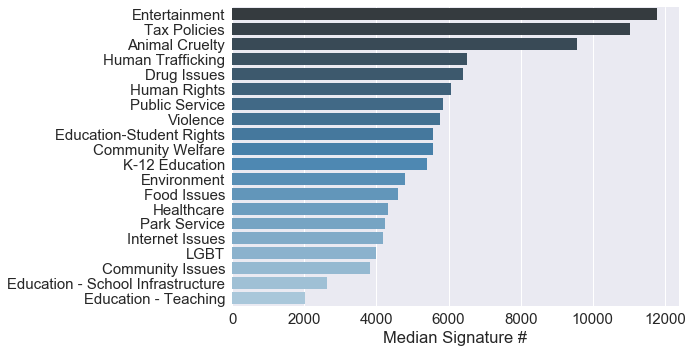

In [247]:
import seaborn as sns
%pylab inline
sns.set(font_scale=1.5)
ax = sns.barplot(x="Median Signature #", y="Cat",
                 data=topic_pop.sort_values(by="Median Signature #", axis=0,ascending=False),
                 palette="Blues_d")
ax.set(xlabel='Median Signature #', ylabel='')


In [144]:
df_train_topic.groupby('main_topics').y_train_log.mean().sort_values(ascending=False)

main_topics
7     4.198482
18    4.117645
8     4.025053
17    3.975299
5     3.909670
1     3.889233
11    3.885223
16    3.873445
9     3.807421
14    3.785615
12    3.769815
13    3.755192
2     3.742371
3     3.724000
19    3.708078
6     3.666834
10    3.666796
15    3.504471
4     3.403309
0     3.258637
Name: y_train_log, dtype: float64

In [146]:
df_test_topic.groupby('main_topics').y_test_log.mean().sort_values(ascending=False)

main_topics
7     4.549863
2     4.535046
17    4.262711
8     4.182328
16    3.963244
9     3.938377
1     3.903286
6     3.801272
3     3.790009
5     3.789710
13    3.756326
4     3.722097
11    3.698867
10    3.659013
19    3.614596
15    3.562263
14    3.297362
0     2.524221
Name: y_test_log, dtype: float64

In [145]:
df_train_topic.groupby('main_topics').y_train.median().sort_values(ascending=False)

main_topics
18    10860.0
11    10390.0
14     8795.0
7      7600.0
9      6630.0
5      6515.0
8      6330.0
12     6250.0
17     5800.0
19     5660.0
1      5640.0
16     5550.0
3      4820.0
6      4690.0
13     4530.0
2      4110.0
10     3300.0
15     3025.0
4      2040.0
0      1045.0
Name: y_train, dtype: float64

In [147]:
df_test_topic.groupby('main_topics').y_test.median().sort_values(ascending=False)

main_topics
7     27225.0
2     26425.0
14    19715.0
9     13280.0
8      9080.0
16     8810.0
17     6520.0
11     6105.0
1      6040.0
10     5990.0
19     5600.0
3      5530.0
5      5420.0
13     3910.0
15     2670.0
4      2010.0
6      1800.0
0       345.0
Name: y_test, dtype: float64

In [63]:
LDA_model_test.print_topics(10)

[(6,
  '0.004*"mountain" + 0.004*"city" + 0.004*"park" + 0.004*"sites" + 0.003*"area" + 0.003*"game" + 0.003*"books" + 0.003*"site" + 0.003*"million" + 0.003*"content"'),
 (12,
  '0.005*"red" + 0.005*"science" + 0.004*"street" + 0.004*"us" + 0.003*"school" + 0.003*"students" + 0.003*"fair" + 0.003*"hair" + 0.003*"side" + 0.003*"allows"'),
 (20,
  '0.005*"la" + 0.005*"expansion" + 0.005*"water" + 0.004*"facebook" + 0.004*"gas" + 0.004*"de" + 0.003*"dc" + 0.003*"bay" + 0.003*"teachers" + 0.003*"policy"'),
 (13,
  '0.006*"look" + 0.004*"traffic" + 0.004*"animal" + 0.004*"shark" + 0.003*"road" + 0.003*"cat" + 0.003*"computer" + 0.003*"science" + 0.003*"fort" + 0.003*"congress"'),
 (1,
  '0.006*"de" + 0.006*"school" + 0.005*"students" + 0.004*"en" + 0.004*"fur" + 0.004*"reading" + 0.003*"police" + 0.003*"sex" + 0.003*"ng" + 0.003*"little"'),
 (16,
  '0.005*"game" + 0.003*"school" + 0.003*"black" + 0.003*"women" + 0.003*"community" + 0.003*"property" + 0.003*"marijuana" + 0.003*"people" + 0.

In [41]:
lsi.print_topics()

[(0,
  '0.168*"school" + 0.123*"students" + 0.103*"children" + 0.093*"community" + 0.093*"city" + 0.090*"would" + 0.086*"us" + 0.085*"people" + 0.082*"family" + 0.079*"state"'),
 (1,
  '-0.266*"cage" + -0.248*"eggs" + -0.229*"battery" + -0.219*"sodexo" + -0.210*"farms" + -0.200*"battery cage" + -0.179*"cruel" + -0.177*"aramark" + -0.160*"practice" + -0.139*"cages"'),
 (2,
  '-0.506*"school" + -0.360*"students" + 0.215*"dog" + -0.165*"high school" + 0.159*"dogs" + -0.148*"student" + -0.137*"high" + 0.127*"animal" + -0.125*"schools" + -0.106*"district"'),
 (3,
  '-0.452*"dog" + -0.351*"dogs" + -0.228*"animal" + -0.218*"school" + -0.168*"animals" + -0.142*"shelter" + 0.130*"women" + -0.129*"pit" + -0.121*"city" + -0.119*"breed"'),
 (4,
  '-0.325*"city" + 0.212*"dog" + 0.204*"school" + -0.151*"council" + -0.145*"park" + -0.119*"area" + -0.117*"residents" + -0.111*"city council" + 0.104*"family" + -0.104*"community"'),
 (5,
  '-0.192*"students" + -0.170*"http" + -0.165*"university" + -0.162

In [26]:
# transform scikit vocabulary into gensim dictionary
# vocabulary_gensim = {}
# for key, val in text_court_vectorizer.items():
#     vocabulary_gensim[val] = key

id2word_dict = dict((v, k) for k, v in text_court_vectorizer.vocabulary_.items())

In [12]:
from sklearn.preprocessing import StandardScaler
#model_tSNE_all = TSNE(n_components=2, random_state=0)
total_scale_train=StandardScaler().fit(np.concatenate((train_text_features,
                                                     train_title_features,x_train[['Title_str_len', 'Text_len_p1', 'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

total_train_scale=total_scale_train.transform(np.concatenate((train_text_features,
                                                     train_title_features,x_train[[
                                                         'Title_str_len', 'Text_len_p1',
                                                         'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))


total_test_scale=total_scale_train.transform(np.concatenate((test_text_features,
                                                             test_title_features, 
                                                x_test[['Title_str_len', 'Text_len_p1',
                                                        'Text_len_p2',
                                      'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

from sklearn.decomposition import PCA
train_pca=PCA(n_components=1500,svd_solver='full')

x_train_pca=train_pca.fit_transform(total_train_scale)

x_test_pca=train_pca.transform(total_test_scale)



In [30]:
# from sklearn.preprocessing import StandardScaler
# #model_tSNE_all = TSNE(n_components=2, random_state=0)
# total_scale_train=StandardScaler().fit(np.concatenate((train_text_idf_features,
#                                                      train_title_idf_features,x_train[['Title_str_len', 'Text_len_p1', 'Text_len_p2',
#                                       'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

# total_train_scale=total_scale_train.transform(np.concatenate((train_text_idf_features,
#                                                      train_title_idf_features,x_train[[
#                                                          'Title_str_len', 'Text_len_p1',
#                                                          'Text_len_p2',
#                                       'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))


# total_test_scale=total_scale_train.transform(np.concatenate((test_text_idf_features,
#                                                              test_title_idf_features, 
#                                                 x_test[['Title_str_len', 'Text_len_p1',
#                                                         'Text_len_p2',
#                                       'Title_len', 'Text_str_len','Image','Tweet']]),axis=1))

# from sklearn.decomposition import PCA
# train_pca=PCA(n_components=1500,svd_solver='full')

# x_train_pca=train_pca.fit_transform(total_train_scale)

# x_test_pca=train_pca.transform(total_test_scale)



In [96]:
import pickle
pickle.dump(total_scale_train,open('total_scale_train_v2.pickle','wb'))
pickle.dump(train_pca,open('train_pca.pickle_v2','wb'))